In [1]:
import pandas as pd
import numpy as np
import fyp_functions as fyp
import matplotlib.pyplot as plt
import itertools
pd.options.display.float_format = "{:,.3f}".format

In [2]:
IMM = fyp.mass_calculate_fairness(n=3, m=2, mechanism='IMM', 
                                          metrics=['mean'])
WMPM = fyp.mass_calculate_fairness(n=3, m=2, mechanism='WMPM', 
                                          metrics=['mean'])

df = pd.merge(IMM, WMPM, left_index=True, right_index=True, suffixes=('_IMM', '_WMPM'))
df.drop(columns=['profile_WMPM'],inplace=True)
df.rename(columns={'mean_IMM':'dist_mean_IMM','mean_WMPM':'dist_mean_WMPM','profile_IMM':'profile'},inplace=True)
df['mean_vote'] = df['profile'].apply(lambda x: np.round(np.mean(x, axis=0),3))
df['dist_mean_IMM'] = df['dist_mean_IMM'].apply(lambda x: np.round(x,3))
df['dist_mean_WMPM'] = df['dist_mean_WMPM'].apply(lambda x: np.round(x,3))
df

,profile,allocation_IMM,dist_mean_IMM,allocation_WMPM,dist_mean_WMPM,mean_vote
0,"[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]","[0.0, 1.0]",0.000,"[0.0, 1.0]",0.000,"[0.0, 1.0]"
1,"[[0.0, 1.0], [0.0, 1.0], [0.1, 0.9]]","[0.1, 0.9]",0.133,"[0.0, 1.0]",0.067,"[0.033, 0.967]"
2,"[[0.0, 1.0], [0.0, 1.0], [0.2, 0.8]]","[0.2, 0.8]",0.267,"[0.0, 1.0]",0.133,"[0.067, 0.933]"
3,"[[0.0, 1.0], [0.0, 1.0], [0.3, 0.7]]","[0.3, 0.7]",0.400,"[0.0, 1.0]",0.200,"[0.1, 0.9]"
4,"[[0.0, 1.0], [0.0, 1.0], [0.4, 0.6]]","[0.333, 0.667]",0.400,"[0.0, 1.0]",0.267,"[0.133, 0.867]"
...,...,...,...,...,...,...
1326,"[[1.0, 0.0], [1.0, 0.0], [0.6, 0.4]]","[0.667, 0.333]",0.400,"[1.0, 0.0]",0.267,"[0.867, 0.133]"
1327,"[[1.0, 0.0], [1.0, 0.0], [0.7, 0.3]]","[0.7, 0.3]",0.400,"[1.0, 0.0]",0.200,"[0.9, 0.1]"
1328,"[[1.0, 0.0], [1.0, 0.0], [0.8, 0.2]]","[0.8, 0.2]",0.267,"[1.0, 0.0]",0.133,"[0.933, 0.067]"
1329,"[[1.0, 0.0], [1.0, 0.0], [0.9, 0.1]]","[0.9, 0.1]",0.133,"[1.0, 0.0]",0.067,"[0.967, 0.033]"


if (what condition):
    this profile belongs to which figure 

max value as iterating over alphas

In [3]:
def get_min_max(P):
    
    df = fyp.iterate_over_alphas(P, np.linspace(0, 1, 10), disutility_type='mean')

    return np.round((max(df['mean']) , min(df['mean'])),3)

df[['max_fairness', 'min_fairness']] = df['profile'].apply(
    lambda p: pd.Series(get_min_max(p))
)

In [4]:
def check_status(df,row):
    if df.loc[row,'dist_mean_IMM'] == df.loc[row,'dist_mean_WMPM']:
        return 'Equal'
    
    elif (df.loc[row,'dist_mean_IMM'] > df.loc[row,'dist_mean_WMPM']): 
        if (df.loc[row,'dist_mean_IMM'] == df.loc[row,'max_fairness']) & (df.loc[row,'dist_mean_WMPM'] == df.loc[row,'min_fairness']) :

            return 'No Tradeoff'
        elif (df.loc[row,'dist_mean_WMPM'] < df.loc[row,'max_fairness']):
            return 'Bend 2'    
    
    elif (df.loc[row,'dist_mean_IMM'] < df.loc[row,'dist_mean_WMPM']):
        if (df.loc[row,'dist_mean_IMM'] == df.loc[row,'min_fairness']):
            return 'Standard Tradeoff'
        
        elif (df.loc[row,'dist_mean_IMM'] > df.loc[row,'min_fairness']):
            return 'Bend 1'

        

for i in range(len(df)):
    df.loc[i,'status']= check_status(df,i)

In [5]:
df.head(20)

,profile,allocation_IMM,dist_mean_IMM,allocation_WMPM,dist_mean_WMPM,mean_vote,max_fairness,min_fairness,status
0,"[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]","[0.0, 1.0]",0.000,"[0.0, 1.0]",0.000,"[0.0, 1.0]",0.000,0.000,Equal
1,"[[0.0, 1.0], [0.0, 1.0], [0.1, 0.9]]","[0.1, 0.9]",0.133,"[0.0, 1.0]",0.067,"[0.033, 0.967]",0.133,0.000,Bend 2
2,"[[0.0, 1.0], [0.0, 1.0], [0.2, 0.8]]","[0.2, 0.8]",0.267,"[0.0, 1.0]",0.133,"[0.067, 0.933]",0.267,0.000,Bend 2
3,"[[0.0, 1.0], [0.0, 1.0], [0.3, 0.7]]","[0.3, 0.7]",0.400,"[0.0, 1.0]",0.200,"[0.1, 0.9]",0.400,0.000,Bend 2
4,"[[0.0, 1.0], [0.0, 1.0], [0.4, 0.6]]","[0.333, 0.667]",0.400,"[0.0, 1.0]",0.267,"[0.133, 0.867]",0.400,0.030,Bend 2
5,"[[0.0, 1.0], [0.0, 1.0], [0.5, 0.5]]","[0.333, 0.667]",0.333,"[0.0, 1.0]",0.333,"[0.167, 0.833]",0.333,0.037,Equal
6,"[[0.0, 1.0], [0.0, 1.0], [0.6, 0.4]]","[0.333, 0.667]",0.267,"[0.0, 1.0]",0.400,"[0.2, 0.8]",0.400,0.030,Bend 1
7,"[[0.0, 1.0], [0.0, 1.0], [0.7, 0.3]]","[0.333, 0.667]",0.200,"[0.0, 1.0]",0.467,"[0.233, 0.767]",0.467,0.022,Bend 1
8,"[[0.0, 1.0], [0.0, 1.0], [0.8, 0.2]]","[0.333, 0.667]",0.133,"[0.0, 1.0]",0.533,"[0.267, 0.733]",0.533,0.015,Bend 1
9,"[[0.0, 1.0], [0.0, 1.0], [0.9, 0.1]]","[0.333, 0.667]",0.067,"[0.0, 1.0]",0.600,"[0.3, 0.7]",0.600,0.007,Bend 1


In [6]:
df['status'].value_counts()

status
Equal                611
Standard Tradeoff    384
No Tradeoff          120
Bend 1               108
Bend 2               108
Name: count, dtype: int64

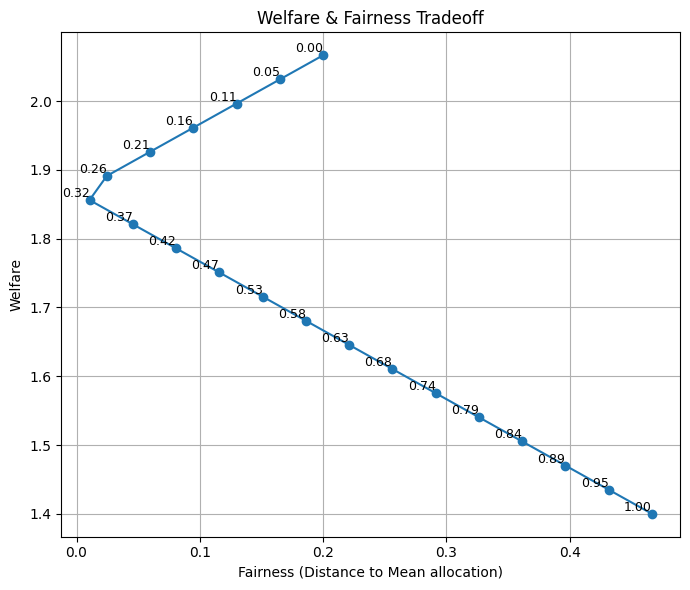

,alpha,Allocation,Welfare,Fairness
0,0.000,"[0.6666666716337204, 0.3333333358168602]",2.067,0.200
1,0.053,"[0.6842105310214193, 0.31578947603702545]",2.032,0.165
2,0.105,"[0.7017543904091182, 0.2982456162571907]",1.996,0.130
3,0.158,"[0.7192982497968172, 0.28070175647735596]",1.961,0.095
4,0.211,"[0.7368421091845161, 0.2631578966975212]",1.926,0.060
5,0.263,"[0.7543859685722151, 0.2456140369176865]",1.891,0.025
6,0.316,"[0.7719298279599139, 0.22807017713785172]",1.856,0.011
7,0.368,"[0.7894736873476129, 0.21052631735801697]",1.821,0.046
8,0.421,"[0.8070175467353118, 0.19298245757818222]",1.786,0.081
9,0.474,"[0.8245614061230108, 0.1754385977983475]",1.751,0.116


In [7]:
p = np.array(	[[1, 0], [1., 0], [0.3, 0.7]]	)
fyp.plot_tradeoff_with_alpha(p,20)

In [8]:
import plotly.express as px

# Extract x, y, z the same way:
df['x'] = df['profile'].apply(lambda p: p[0][0])  # x
df['y'] = df['profile'].apply(lambda p: p[1][0])  # y
df['z'] = df['profile'].apply(lambda p: p[2][0])  # z

# Plotly scatter 3D
fig = px.scatter_3d(
    df,
    x='x',
    y='y',
    z='z',
    color='status',  # color points by status
    title='3D Profile Scatter by Status'
)

fig.show()

In [42]:
from sklearn.tree import DecisionTreeClassifier, export_text

# df2 = df[df['status']!='Equal']

# X = df2[['x', 'y', 'z']]
# y = df2['status']

X = df[['x', 'y', 'z']]
y = df['status']

clf = DecisionTreeClassifier(max_depth=6, random_state=42,class_weight='balanced')
clf.fit(X, y)
rules = export_text(clf, feature_names=['x', 'y', 'z'])

y_pred = clf.predict(X)


print(rules)

|--- y <= 0.15
|   |--- z <= 0.55
|   |   |--- x <= 0.55
|   |   |   |--- z <= 0.15
|   |   |   |   |--- x <= 0.25
|   |   |   |   |   |--- x <= 0.15
|   |   |   |   |   |   |--- class: Bend 2
|   |   |   |   |   |--- x >  0.15
|   |   |   |   |   |   |--- class: Bend 2
|   |   |   |   |--- x >  0.25
|   |   |   |   |   |--- x <= 0.45
|   |   |   |   |   |   |--- class: Bend 2
|   |   |   |   |   |--- x >  0.45
|   |   |   |   |   |   |--- class: Bend 2
|   |   |   |--- z >  0.15
|   |   |   |   |--- x <= 0.15
|   |   |   |   |   |--- z <= 0.25
|   |   |   |   |   |   |--- class: Bend 2
|   |   |   |   |   |--- z >  0.25
|   |   |   |   |   |   |--- class: Bend 2
|   |   |   |   |--- x >  0.15
|   |   |   |   |   |--- z <= 0.25
|   |   |   |   |   |   |--- class: No Tradeoff
|   |   |   |   |   |--- z >  0.25
|   |   |   |   |   |   |--- class: No Tradeoff
|   |   |--- x >  0.55
|   |   |   |--- z <= 0.35
|   |   |   |   |--- x <= 0.85
|   |   |   |   |   |--- z <= 0.25
|   |   |   |  

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

accuracy = accuracy_score(y, y_pred)
cm = confusion_matrix(y, y_pred, labels=clf.classes_)
report = classification_report(y, y_pred, labels=clf.classes_)

print("Training Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_))
print("\nClassification Report:")
print(report)

Training Accuracy: 0.6859504132231405

Confusion Matrix:
                   Bend 1  Bend 2  Equal  No Tradeoff  Standard Tradeoff
Bend 1                 83       6      1            5                 13
Bend 2                  0      72      0           33                  3
Equal                  19      26    393           98                 75
No Tradeoff             3      23      0           78                 16
Standard Tradeoff      59       1     15           22                287

Classification Report:
                   precision    recall  f1-score   support

           Bend 1       0.51      0.77      0.61       108
           Bend 2       0.56      0.67      0.61       108
            Equal       0.96      0.64      0.77       611
      No Tradeoff       0.33      0.65      0.44       120
Standard Tradeoff       0.73      0.75      0.74       384

         accuracy                           0.69      1331
        macro avg       0.62      0.70      0.63      1331
     we

c:\Users\TANHOL\Workspace\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



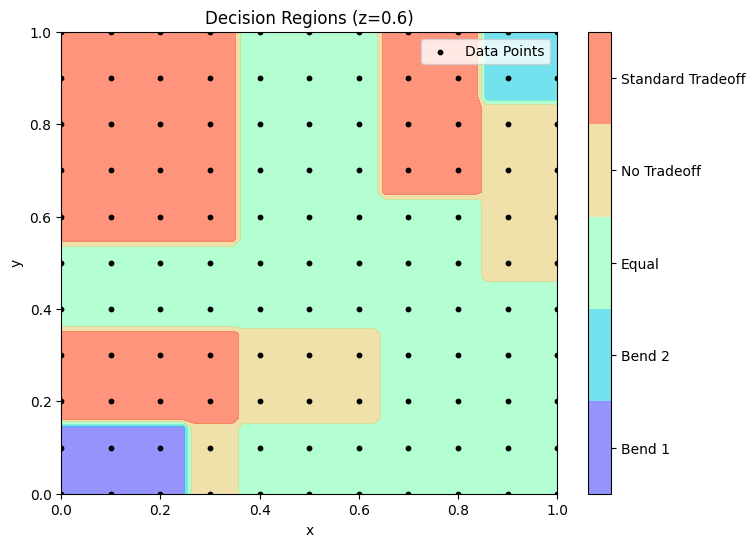

In [46]:
z_val = 0.6

# Generate grid in the x,y range
num_points = 50
x_min, x_max = df['x'].min(), df['x'].max()
y_min, y_max = df['y'].min(), df['y'].max()
xs = np.linspace(x_min, x_max, num_points)
ys = np.linspace(y_min, y_max, num_points)
xx, yy = np.meshgrid(xs, ys)

# Flatten to predict
grid_points = np.column_stack([xx.ravel(), yy.ravel(), np.full(xx.size, z_val)])
preds = clf.predict(grid_points)

# ------------------------------------------------------------------
# 2. Convert string labels to numeric codes
#    but we'll use them only for 'contourf'
# ------------------------------------------------------------------
unique_labels = sorted(df['status'].unique())  
# For example: ["Bend 1", "Bend 2", "Equal", "No Tradeoff", "Standard Tradeoff"]

label_to_value = {label: i for i, label in enumerate(unique_labels)}
# e.g. "Bend 1" -> 0, "Bend 2" -> 1, "Equal" -> 2, "No Tradeoff" -> 3, "Standard Tradeoff" -> 4

# Map the predicted string labels to these numeric codes
encoded_labels = np.array([label_to_value[label] for label in preds])
encoded_labels = encoded_labels.reshape(xx.shape)

# ------------------------------------------------------------------
# 3. Plot contourf but show string labels in the colorbar
# ------------------------------------------------------------------
plt.figure(figsize=(8,6))
# We'll have one contour region per class
# Define levels so that each integer class is its own region
levels = np.arange(len(unique_labels) + 1) - 0.5  # e.g. [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
contour = plt.contourf(xx, yy, encoded_labels, levels=levels, alpha=0.6, cmap='rainbow')

# Create a colorbar
cbar = plt.colorbar(contour, ticks=np.arange(len(unique_labels)))
cbar.set_ticklabels(unique_labels)  # replace 0,1,2... with actual string labels

plt.title(f"Decision Regions (z={z_val})")
plt.xlabel('x')
plt.ylabel('y')

# Optional: overlay some actual data points near z=z_val
mask = (df['z'] - z_val).abs() < 0.05  # within 0.05 of z_val
plt.scatter(df.loc[mask, 'x'], df.loc[mask, 'y'], c='k', s=10, label='Data Points')

plt.legend()
plt.show()

In [39]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import confusion_matrix, classification_report

def boundary_for_two_statuses(df, status1, status2, max_depth=3):
    """
    Train a small decision tree to distinguish only between status1 and status2.
    Return the trained classifier and print interpretative boundary rules.
    """
    # 1. Filter the DataFrame
    df_filtered = df[df['status'].isin([status1, status2])].copy()
    
    # If the user wants a smaller or bigger subset, they can adjust the conditions here.
    # Example: you might want x < 0.8, y > 0.2, etc., but we’ll keep it simple.
    
    # 2. Extract features (x, y, z) and the binary label
    X = df_filtered[['x', 'y', 'z']]
    y = df_filtered['status']
    
    # 3. Train a decision tree on these two statuses
    # We use a small max_depth so the boundary is simpler to interpret
    # class_weight='balanced' helps if one class is smaller than the other
    clf = DecisionTreeClassifier(
        max_depth=max_depth,
        class_weight='balanced',
        random_state=42
    )
    clf.fit(X, y)

    # 4. Predict on the *same* subset to check how well we separate these two statuses
    y_pred = clf.predict(X)

    # 5. Print basic performance metrics
    print(f"Trained a decision tree to separate '{status1}' and '{status2}' with max_depth={max_depth}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y, y_pred, labels=[status1, status2])
    print(pd.DataFrame(cm, index=[status1, status2], columns=[status1, status2]))
    
    print("\nClassification Report:")
    print(classification_report(y, y_pred, labels=[status1, status2]))
    
    # 6. Export the tree rules in text form for easy interpretation
    rules = export_text(clf, feature_names=['x', 'y', 'z'])
    print("\nDecision Tree Rules:")
    print(rules)

    return clf, df_filtered

clf_two_class, df_two_class = boundary_for_two_statuses(
    df,
    status1='No Tradeoff',
    status2='Standard Tradeoff',
    max_depth=13
)

Trained a decision tree to separate 'No Tradeoff' and 'Standard Tradeoff' with max_depth=13

Confusion Matrix:
                   No Tradeoff  Standard Tradeoff
No Tradeoff                120                  0
Standard Tradeoff            3                381

Classification Report:
                   precision    recall  f1-score   support

      No Tradeoff       0.98      1.00      0.99       120
Standard Tradeoff       1.00      0.99      1.00       384

         accuracy                           0.99       504
        macro avg       0.99      1.00      0.99       504
     weighted avg       0.99      0.99      0.99       504


Decision Tree Rules:
|--- y <= 0.25
|   |--- z <= 0.65
|   |   |--- x <= 0.65
|   |   |   |--- z <= 0.55
|   |   |   |   |--- x <= 0.55
|   |   |   |   |   |--- z <= 0.45
|   |   |   |   |   |   |--- x <= 0.45
|   |   |   |   |   |   |   |--- class: No Tradeoff
|   |   |   |   |   |   |--- x >  0.45
|   |   |   |   |   |   |   |--- y <= 0.15
|   |   |   |

In [63]:
import numpy as np
import pandas as pd
import plotly.express as px

df['z_slice'] = df['z'].apply(lambda val: round(val, 1))

fig = px.scatter(
    df,
    x='x', 
    y='y',
    color='status',    # color by status
    facet_col='z_slice',
    facet_col_wrap=5,  # how many facet columns before wrapping to a new row
    title='(x,y) Scatter by Rounded z-Slices'
    
)

# Make x,y have the same scale in each subplot (so circles aren't distorted)
fig.update_yaxes(scaleanchor="x", scaleratio=1)

fig.show()